# ERA5 time series of *u10m* variable in 1999 Nov./Dec. AR event
Created by Eric S. Martinez  
23 June 2021

## Importing libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime


## Read in data

In [2]:
# Reading in the full dataset and creating 'mini' datasets from dimensions and u10 variable
path_name = '/Users/atoc_reu_student/Downloads/ERA5/Data/Hourly/'
file_name = 'era5_sl_hourly_Antarctic_u10m_1999_nov_dec.nc'
full_dataset = xr.open_mfdataset(path_name + file_name)
e5_u10 = full_dataset.u10
longitude = full_dataset.longitude
latitude = full_dataset.latitude
time = full_dataset.time


In [3]:
e5_u10

<xarray.DataArray 'u10' (time: 1464, latitude: 721, longitude: 1440)>
dask.array<open_dataset-de2e6a39f56727865078b80957cdf840u10, shape=(1464, 721, 1440), dtype=float32, chunksize=(1464, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1999-11-01 ... 1999-12-31T23:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [4]:
# Setting the time variable to a simpler, more usable format

time = np.array(time) # Making the time 'dataset' into an array
time_dates = [] # Creating a blank array called 'time_dates'
for i in range(len(time)):
    string = time[i].astype(str)
    split = string.split("T", 1)
    time_dates.append(split[0])
    

## Setting the gridpoints of the dataset to the nearest location of Cavity and Channel camps

In [5]:
# Locations of AWS stations at Thwaites Cavity and Channel Camps

# cavity lat = -75.033
# cavity lon = -105.617 
# channel lat = -75.050
# channel lon = -105.4334 

# Setting the gridpoints to the nearest point in reality

# Converting the snowfall into millimeters, making it easier to read
e5_u10_cavity_channel_loc = np.array(e5_u10[:,660,1018])
# Snowfall in meters (what the data actually is)
# e5_sf_cavity_channel_loc_m = np.array(e5_sf[:,660,1018])


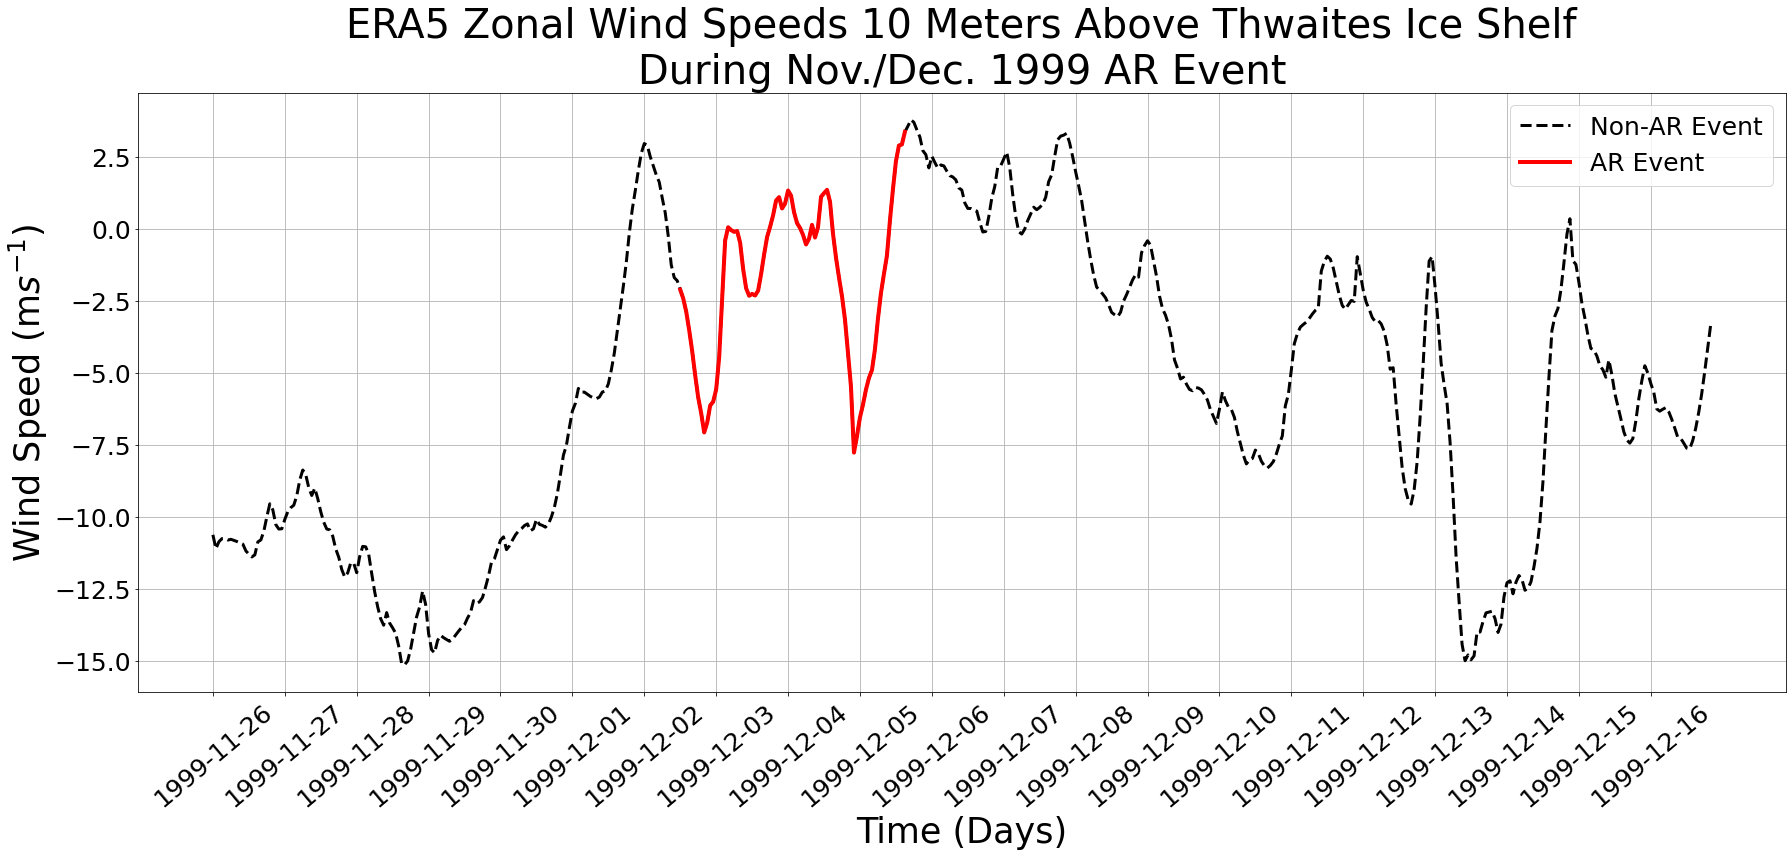

In [6]:
# Plotting time series of snowfall due to AR event in millimeters
plt.figure(figsize=(25,12))
xaxis = np.linspace(0, len(time)-1, len(time))
plt.plot(xaxis[600:1101],e5_u10_cavity_channel_loc[600:1101], '--',linewidth = 3, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832],e5_u10_cavity_channel_loc[756:832], linewidth = 4, color = 'red', label = 'AR Event')
plt.xticks(xaxis[600:1101][::24], time_dates[600:1101][::24], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (Days)', fontsize = 35)
plt.ylabel(r'Wind Speed (m$s^{-1}$)', fontsize = 35)
plt.title('ERA5 Zonal Wind Speeds 10 Meters Above Thwaites Ice Shelf\n' + 'During Nov./Dec. 1999 AR Event', fontsize = 40)
plt.grid()
plt.legend(loc = 'upper right', prop = {'size': 25})
plt.tight_layout()
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_zonal_wind_speeds_nov26_dec16.jpg", dpi = 100)
plt.show()


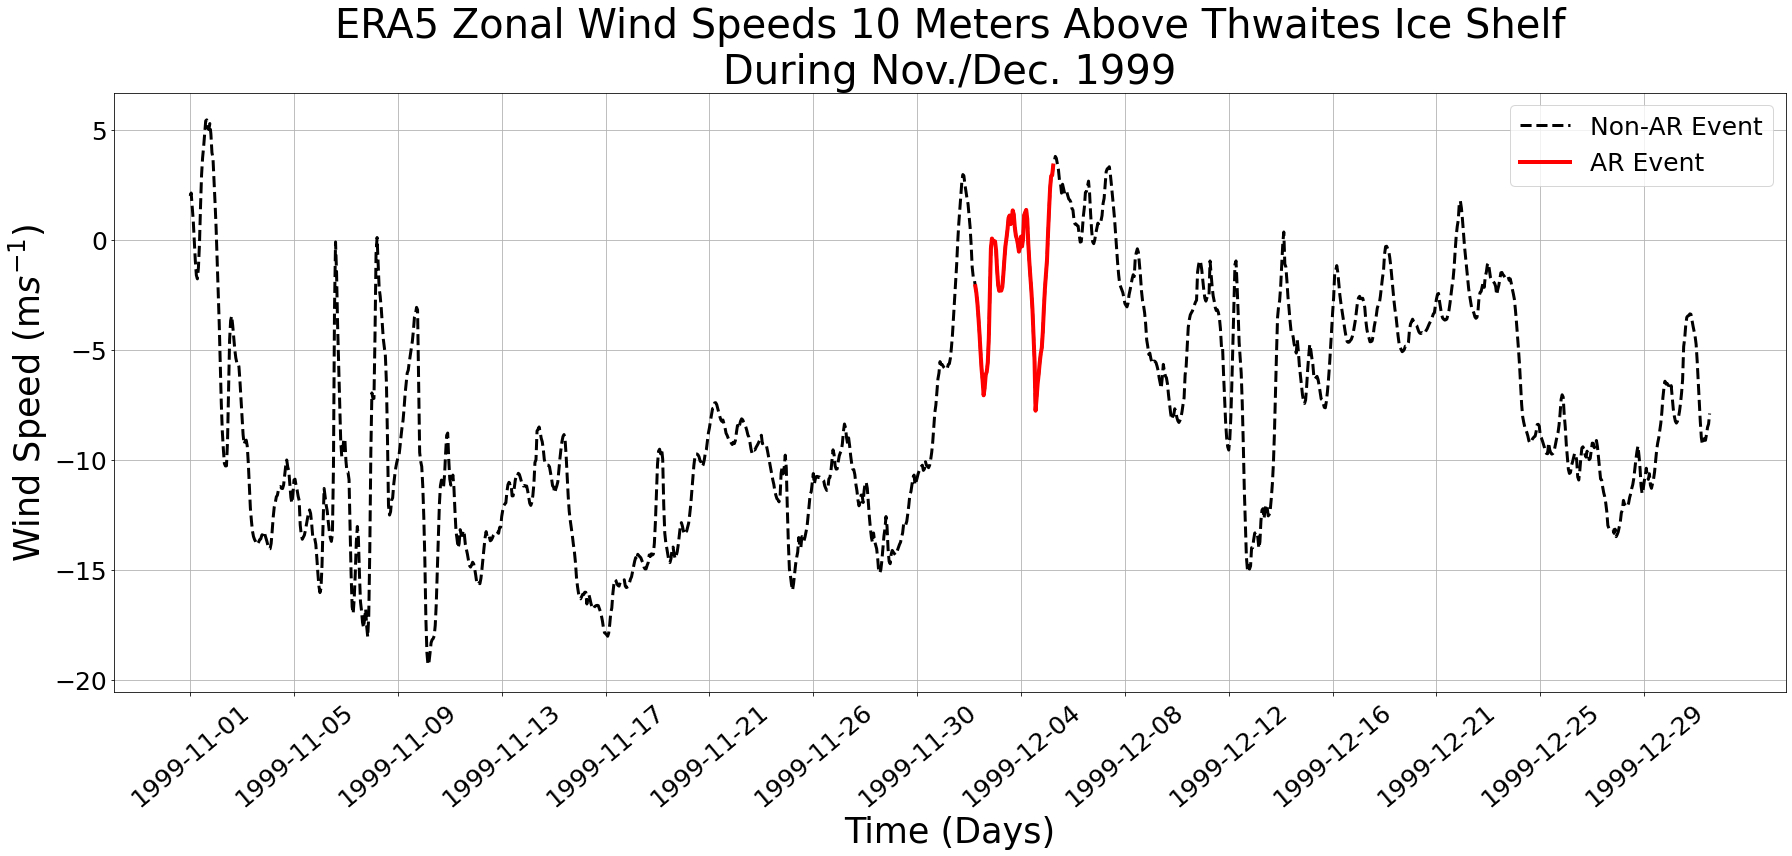

In [7]:
# Plotting time series of snowfall due to AR event in millimeters
plt.figure(figsize=(25,12))
xaxis = np.linspace(0, len(time)-1, len(time))
plt.plot(xaxis,e5_u10_cavity_channel_loc, '--', linewidth = 3, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832],e5_u10_cavity_channel_loc[756:832], linewidth = 4, color = 'red', label = 'AR Event')
plt.xticks(xaxis[::100], time_dates[::100], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (Days)', fontsize = 35)
plt.ylabel(r'Wind Speed (m$s^{-1}$)', fontsize = 35)
plt.title('ERA5 Zonal Wind Speeds 10 Meters Above Thwaites Ice Shelf\n' + 'During Nov./Dec. 1999', fontsize = 40)
plt.grid()
plt.legend(loc = 'upper right', prop = {'size': 25})
plt.tight_layout()
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_zonal_wind_speeds_nov1_dec29.jpg", dpi = 100)
plt.show()


In [9]:
e5_u10_cavity_channel_loc[823]

-2.2279973